In [1]:
import psycopg2
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
DB_PARAMS = {
    "dbname": os.getenv("POSTGRES_DB"),
    "user": os.getenv("POSTGRES_USER"),
    "password": os.getenv("POSTGRES_PASSWORD"), 
    "host": "postgres",
    "port":  5432
}

In [4]:
try:
    conn = psycopg2.connect(**DB_PARAMS)
    cursor = conn.cursor()
    cursor.execute(""" 
            SELECT event_type,
            COUNT(*) AS event_count
            FROM customers
            GROUP BY event_type
            ORDER BY event_count DESC
    """)
    data = cursor.fetchall()

    cursor.close()
    conn.close()
except Exception as e:
    print(f"❌ An error occurred: {e}")

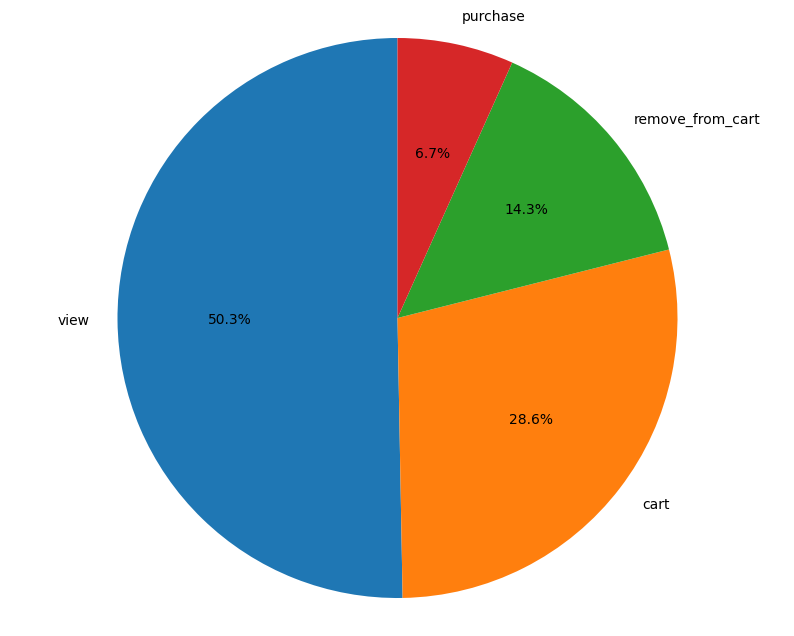

In [5]:
types = [row[0] for row in data]
counts = [row[1] for row in data]
plt.figure(figsize=(10, 8))
plt.pie(counts, labels=types, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.close()